# `Case study on Thera Bank Personal Loan Campaign`

## `Context: `
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.


## `Objective:`
The classification goal is to predict the likelihood of a liability customer buying personal loans.

## `Attributes Information:`

* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer
* ZIP Code: Home Address ZIP code.
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any.
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?


# Import Libraries and Load Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


- From looking at thbe data in the first 5 rows we can say
    - Most of the data looks catogorical but we have so see uniquie values to decide that.
    

In [4]:
bank.shape

(5000, 14)

## Univariate Analysis

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- There are not missing data.
- From the info() we can see that each column has full 5000 data.

In [6]:
#Lets analysze the distribution of the various attribute

bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- Experience has some negative data which does not make sence.
- We can deal with it later.

In [7]:
# Let print all the rows with negative 'Experience'

listOfNegativeExperience = bank.loc[bank['Experience'] < 0]
print(listOfNegativeExperience)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90   25          -1     113     94303       4   2.30          3   
226    227   24          -1      39     94085       2   1.70          2   
315    316   24          -2      51     90630       3   0.30          3   
451    452   28          -2      48     94132       2   1.75          3   
524    525   24          -1      75     93014       4   0.20          1   
536    537   25          -1      43     92173       3   2.40          2   
540    541   25          -1     109     94010       4   2.30          3   
576    577   25          -1      48     92870       3   0.30          3   
583    584   24          -1      38     95045       2   1.70          2   
597    598   24          -2     125     92835       2   7.20          1   
649    650   25          -1      82     92677       4   2.10          3   
670    671   23          -1      61     92374       4   2.60          1   
686    687   24          

- We can see the entries with negative experience is seen in younger demographics.
- Ideally younger demographics will have less experience.
- Values that are negative are -1, -2 and -3
- SO we can justify that we can just change the sign of negative experience.


In [8]:
# We can use abs function to make all the values positive

bank['Experience'] = bank['Experience'].abs()
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
bank.isnull().values.any() # If there are any null values in data set

False

In [10]:
# 2.1 Number of Unique in each column

bank.nunique() 

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [11]:
# 2.2 Number of people with zero mortgage

print("Number of people with zero Mortgage =",bank[bank['Mortgage'] == 0].shape[0])

Number of people with zero Mortgage = 3462


In [12]:
# 2.3 Number of people with zero credit card spending per month

print("Number of people with zero credit card spending per month =", bank[bank['CCAvg'] == 0].shape[0])

Number of people with zero credit card spending per month = 106


In [13]:
# 2.4 Value counts of all categorical column "Education"

bank['Education'].value_counts().sort_values()

2    1403
3    1501
1    2096
Name: Education, dtype: int64

In [14]:
# 2.4 Value counts of all categorical column "Personal Loan"

bank['Personal Loan'].value_counts().sort_values()

1     480
0    4520
Name: Personal Loan, dtype: int64

In [15]:
# 2.4 Value counts of all categorical column "Securities Account"

bank['Securities Account'].value_counts().sort_values()

1     522
0    4478
Name: Securities Account, dtype: int64

In [16]:
# 2.4 Value counts of all categorical column "Online"

bank['Online'].value_counts().sort_values()

0    2016
1    2984
Name: Online, dtype: int64

In [17]:
# 2.4 Value counts of all categorical column "CreditCard"

bank['CreditCard'].value_counts().sort_values()

1    1470
0    3530
Name: CreditCard, dtype: int64

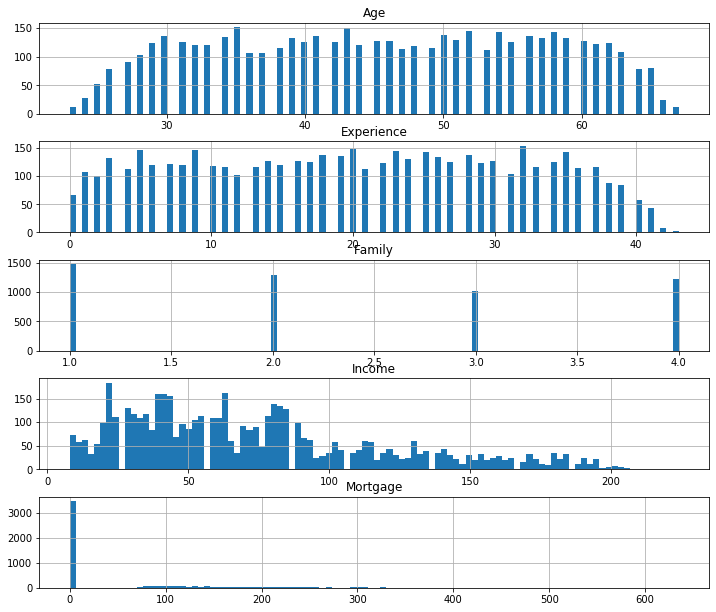

In [18]:
#for continuous vairalble draw hist

bank[['Age','Experience','Income','Family','Mortgage']].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,1)); 

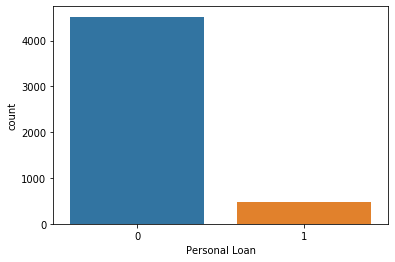

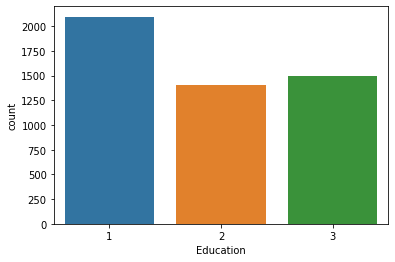

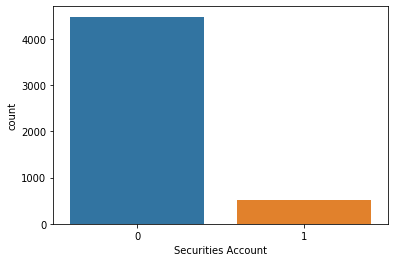

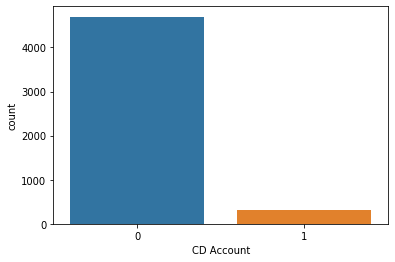

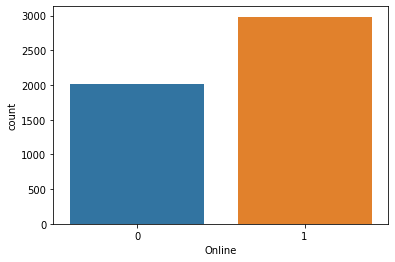

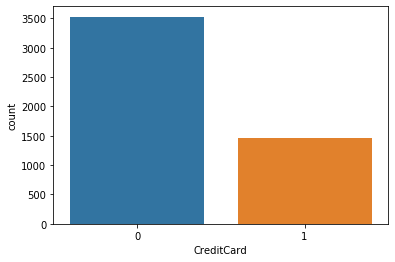

In [19]:
l=['Personal Loan','Education','Securities Account','CD Account','Online','CreditCard']
for i in l:
    sns.countplot(bank[i])
    plt.show()

# Bivariate Anslysis

In [20]:
#Convert X & Y variable to a categorical variable wherever relevant

bank['Family'] = bank['Family'].astype('category')
bank['Education'] = bank['Education'].astype('category')
bank['Personal Loan'] = bank['Personal Loan'].astype('category')
bank['Securities Account'] = bank['Securities Account'].astype('category')
bank['CD Account'] = bank['CD Account'].astype('category')
bank['Online'] = bank['Online'].astype('category')
bank['CreditCard'] = bank['CreditCard'].astype('category')

In [21]:
bank.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [22]:
# Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
bank.groupby(["Personal Loan"]).mean()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
Personal Loan,,,,,,,
0,2512.165487,45.367257,20.165487,66.237389,93152.428761,1.729009,51.789381
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,3.905354,100.845833


In [23]:
bank.groupby(["Personal Loan"]).median()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
Personal Loan,,,,,,,
0,2518.5,45.0,20.0,59.0,93437.0,1.4,0.0
1,2342.0,45.0,20.0,142.5,93407.0,3.8,0.0


- Customer getting personal loan has higher income and CC usage.
- target variable is not dependent on Age, Experience.

In [24]:
pd.crosstab(bank['Family'],bank['Personal Loan'],normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


- Family size of 3 and 4 are more likely to take personal loan then family size 1 & 2

In [25]:
pd.crosstab(bank['Education'],bank['Personal Loan'],normalize='index')

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


- Customer with Education level 3 is more likely to take personal loan.

In [26]:
pd.crosstab(bank['Online'],bank['Personal Loan'],normalize='index')

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


In [27]:
pd.crosstab(bank['CreditCard'],bank['Personal Loan'],normalize='index')

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


- Customer who use internet banking facility and who had creditcard does not impact target variable.

# Identify Correlation in data

In [28]:
bank.corr() # It will show correlation matrix 

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.024675,-0.013920
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.052012,-0.012539
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.049738,-0.011097
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,0.645984,0.206806
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,-0.004061,0.007383
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,1.000000,0.109905
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,0.109905,1.000000


In [29]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

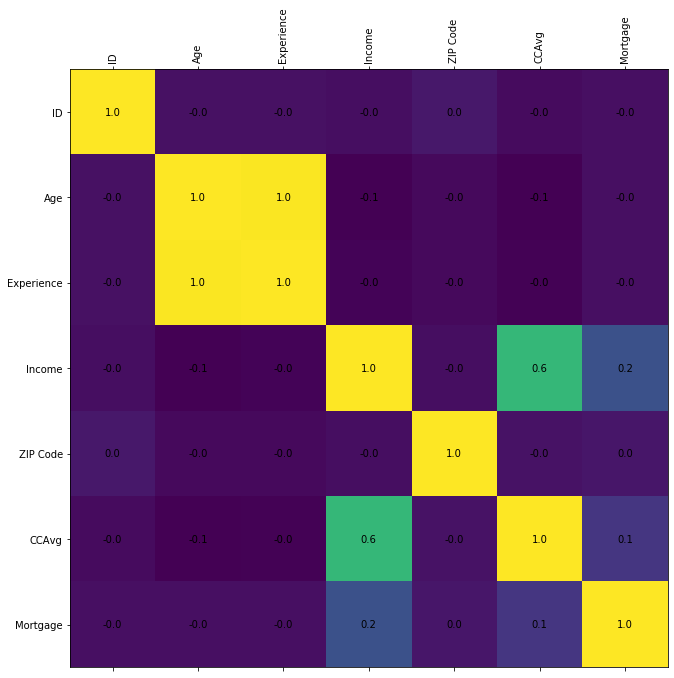

In [30]:
plot_corr(bank)

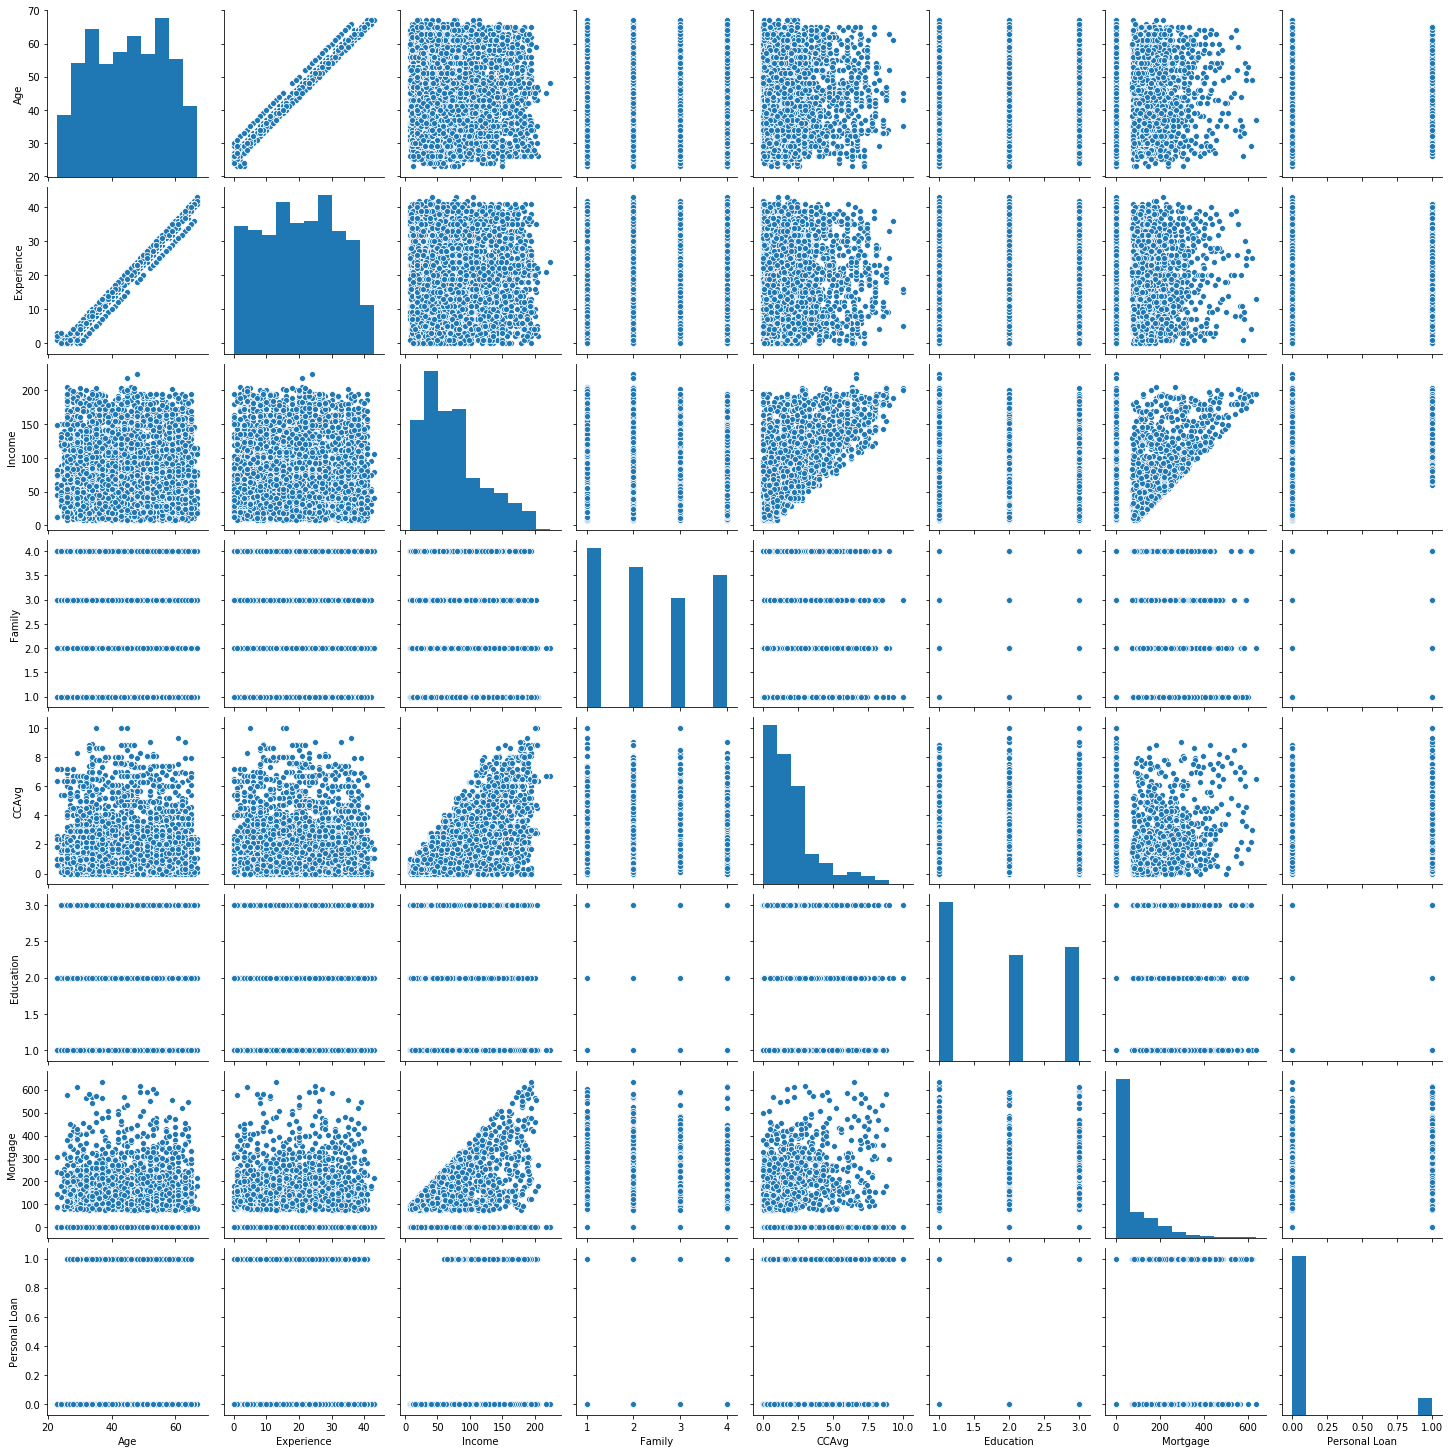

In [31]:
# For drawing pairplot  we can drop 'ID','ZIP Code','Securities Account','CD Account','Online','CreditCard'

bank_bi = bank.drop(['ID','ZIP Code','Securities Account','CD Account','Online','CreditCard'],axis=1)
sns.pairplot(bank_bi);

## Spliting the data 
We will use 70% of data for training and 30% for testing.

In [32]:
from sklearn.model_selection import train_test_split as Split

X = bank.drop(['Personal Loan'], axis =1)
Y = bank['Personal Loan'] # Predicted class (1=True, 0=False) (1 X m)

X_Train, X_Test, Y_Train, Y_Test = Split(X,Y,test_size=0.30,random_state=7)

X_Train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
717,718,59,34,94,93940,3,0.5,1,0,0,0,0,1
2496,2497,63,37,32,93117,3,0.7,2,141,0,0,0,0
2469,2470,43,18,89,92780,1,0.1,2,307,0,0,0,1
1375,1376,50,26,179,92612,1,2.9,3,0,0,0,0,1
2742,2743,39,14,89,95762,2,0.4,1,0,0,0,1,0


Lets check split of data

In [33]:
print("{0:0.2f}% data is in training set".format((len(X_Train)/len(bank.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_Test)/len(bank.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [34]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7)
logreg.fit(X_Train, Y_Train)                    # fit the model on train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_predict = logreg.predict(X_Test)              # Predicting the target variable on test data

In [36]:
# Observe the predicted and observed classes in a dataframe.

z = X_Test.copy()
z['Observed Loan Status'] = Y_Test
z['Predicted Loan Status'] = y_predict
z.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Loan Status,Predicted Loan Status
3406,3407,42,12,34,92177,3,2.0,3,0,0,0,0,1,0,0
757,758,52,28,81,91745,3,1.8,2,0,1,0,0,0,0,0
3624,3625,58,28,70,92028,1,1.4,3,0,0,0,0,0,0,0
4544,4545,28,4,80,95819,3,2.5,1,0,0,0,1,0,0,0
3235,3236,60,35,39,91711,2,1.6,3,0,0,0,1,0,0,0


In [37]:
## function to get confusion matrix in a proper format

def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.9054285714285715

Testing accuracy 0.9153333333333333

Confusion Matrix


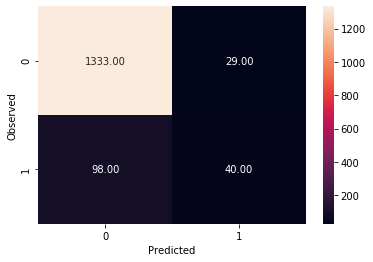

None

Recall: 0.2898550724637681

Precision: 0.5797101449275363

F1 Score: 0.3864734299516908

Roc Auc Score: 0.6342814275681542


In [38]:
print("Training accuracy",logreg.score(X_Train,Y_Train))  
print()
print("Testing accuracy",logreg.score(X_Test, Y_Test))
print()
print('Confusion Matrix')
print(draw_cm(Y_Test,y_predict))
print()
print("Recall:",recall_score(Y_Test,y_predict))
print()
print("Precision:",precision_score(Y_Test,y_predict))
print()
print("F1 Score:",f1_score(Y_Test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_Test,y_predict))

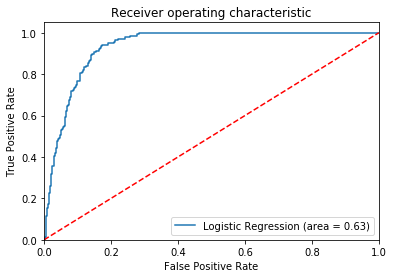

In [39]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_Test, logreg.predict(X_Test))
fpr, tpr, thresholds = roc_curve(Y_Test, logreg.predict_proba(X_Test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Improving Model Performance via Checking Parameters of Logistic Regression

In [40]:
# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

- How to improve model performance
    - By checking the parameters and try changing it and then verify using model metrics whether performance increased or not.

In [41]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_Train, Y_Train) 
    y_predict = model.predict(X_Test)     
    train_score.append(round(model.score(X_Train, Y_Train),3))
    test_score.append(round(model.score(X_Test, Y_Test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.949, 0.905, 0.906, 0.902, 0.902]

[0.951, 0.915, 0.915, 0.908, 0.908]


In [42]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_Train, Y_Train) 
    y_predict = model.predict(X_Test)     
    train_score.append(round(model.score(X_Train, Y_Train),3))
    test_score.append(round(model.score(X_Test, Y_Test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.95, 0.902]

[0.954, 0.908]


- Highest accuracy is almost same 'l1' with 'liblinear' and 'l2' with 'newton-cg'

choose any one. I am choosing 'l1' with 'liblinear'

In [43]:
model = LogisticRegression(random_state=7,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_Train, Y_Train) 

y_predict = model.predict(X_Test)     

print("Training accuracy",model.score(X_Train,Y_Train))  
print()
print("Testing accuracy",model.score(X_Test, Y_Test))

Training accuracy 0.8925714285714286

Testing accuracy 0.8926666666666667


In [44]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=7,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_Train, Y_Train) 
    y_predict = model.predict(X_Test)     
    train_score.append(round(model.score(X_Train, Y_Train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_Test, Y_Test),3))    # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.877, 0.889, 0.892, 0.893, 0.891, 0.893]

[0.88, 0.891, 0.895, 0.895, 0.893, 0.893]


- Best testing accuracy is obtained for C=0.5, which is default

Training accuracy 0.8928571428571429

Testing accuracy 0.8946666666666667

Confusion Matrix


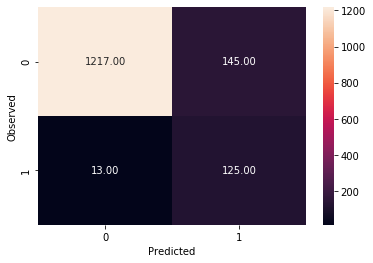

None

Recall: 0.9057971014492754

Precision: 0.46296296296296297

F1 Score: 0.6127450980392157

Roc Auc Score: 0.8996680074059886


In [45]:
#Therefore final model is

model = LogisticRegression(random_state=7,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5) 
model.fit(X_Train, Y_Train)
y_predict = model.predict(X_Test)
print("Training accuracy",model.score(X_Train,Y_Train))  
print()
print("Testing accuracy",model.score(X_Test, Y_Test))
print()
print('Confusion Matrix')
print(draw_cm(Y_Test,y_predict))
print()
print("Recall:",recall_score(Y_Test,y_predict))
print()
print("Precision:",precision_score(Y_Test,y_predict))
print()
print("F1 Score:",f1_score(Y_Test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_Test,y_predict))

## <a id = "link8"></a>Business Insights of model

`Confusion matrix explains`

*True Positive (observed=1,predicted=1):*

Predicted that liability customer will buy personal loan and the customer bought personal loan

*False Positive (observed=0,predicted=1):*

Predicted that liability customer will buy personal loan and the customer did not buy personal loan

*True Negative (observed=0,predicted=0):*

Predicted that liability customer will not buy personal loan and the customer did not buy personal loan

*False Negative (observed=1,predicted=0):*

Predicted that liability customer will not buy personal loans and the customer customer bought personal loan

Here the bank wants to the liability custonmer to buy personal loan i.e. **more number of True Positive**, if TP is high bank would get more customer to buy personal loan. Hence **Recall is the important metric**.

In case of False positive bank will lose time thinking the customer will get personal loan and actuall they not getting it..

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who will get personal loan. They can use the model for other liability customers to see who will get personal loan..